# Data-X Spring 2019: Homework 05

### Linear regression & Logistic regression



## Name: Ran Meng

## SID:  3034368718




In this homework, you will do some exercises on prediction using sklearn. 

REMEMBER TO DISPLAY ALL OUTPUTS. If the question asks you to do something, make sure to print your results.


## Part 1 - Regression


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__ 
(Link in the Assignment details page on Bcourses) 

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1.1
Read the data file from the csv.

Print the count of NaN values for each attribute in the dataset.

Print the Range (min, max) and percentiles (25th, 50th, and 75th) of each attribute in the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# your code
df = pd.read_csv('energy.csv')
print("Count of NaN values for each attribute: \n", df.isnull().sum())
df.describe().loc[['min','max','25%', '50%', '75%']]

Count of NaN values for each attribute: 
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,Y1
min,0.6200,514.500,245.0,110.250,3.50,2.00,0.00,0.00,6.0100
max,0.9800,808.500,416.5,220.500,7.00,5.00,0.40,5.00,43.1000
25%,0.6825,606.375,294.0,140.875,3.50,2.75,0.10,1.75,12.9925
50%,0.7500,673.750,318.5,183.750,5.25,3.50,0.25,3.00,18.9500
75%,0.8300,741.125,343.0,220.500,7.00,4.25,0.40,4.00,31.6675


 __REGRESSION__:

Using the data, we want to predict "Heating load". The output variable is continuous. Hence, we need to use a regression algorithm.  

__Q 1.2:__ 

Split the dataset randomly into train and test. Train a **Linear Regression** model on 80% of the data (80-20 split).
What is the intercept and coefficient values?



In [3]:
# your code
from sklearn.model_selection import train_test_split
X = df.loc[:, 'X1':'X8']
Y = df["Y1"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
print('Number of training samples: ', len(X_train))
print('Number of testing samples: ', len(X_test))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
print('\nIntercept Value: ', model.intercept_)
print('Coefficient Values: ', model.coef_)

Number of training samples:  614
Number of testing samples:  154

Intercept Value:  79.13116174147392
Coefficient Values:  [-6.33926290e+01 -5.86380428e-02  3.46024305e-02 -4.66202367e-02
  4.36194652e+00  1.81224259e-02  1.98760201e+01  2.19167208e-01]



#### Q.1.3: 

Create a function which takes arrays of prediction and actual values of the output as parameters to calculate **'Root Mean Square error'** (RMSE) metric:  

1. Use the function to calculate the training RMSE  
2. Use the function to calculate the test RMSE



In [4]:
# your code
def RMSE(prediction, actual):
    return np.sqrt(np.mean(np.square(prediction - actual)))

# Calculate RMSE for training data:
Y_pred_train = model.predict(X_train)
print ('Training RMSE: ', RMSE(Y_pred_train, Y_train))

# Calculate RMSE for testing data:
Y_pred_test = model.predict(X_test)
print ('Testing RMSE: ', RMSE(Y_pred_test, Y_test))

Training RMSE:  2.9242420751260125
Testing RMSE:  2.905413624299769



#### Q1.4: 

Let's see the effect of amount of data on the performance of prediction model. Use varying amounts of data (100,200,300,400,500,all) from the training data you used previously to train different regression models. Report  training error and test error in each case. Test data  is the same as above for  all  these cases.

**Plot error rates vs number of training examples.** Both the training error and the test error should be plotted. Comment on the relationship you observe between the amount of data used to train the model and the test accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

In [5]:
training_size = np.array([100, 200, 300, 400, 500, len(df)])
r = training_size/len(df) # training data ratio
training_errors = []
testing_errors = []

for i in range(len(training_size)):
    X_train_loop, X_test_loop, Y_train_loop, Y_test_loop = train_test_split(X, Y, test_size = 1- r[i], random_state = 100) 
    model= LinearRegression()
    model.fit(X_train_loop, Y_train_loop)

    training_accuracy = model.score(X_train_loop,Y_train_loop)
    print ('\nTraining Accuracy for', training_size[i],  'training samples:', training_accuracy)
    testing_accuracy = model.score(X_test,Y_test)
    print('\nTesting Accuracy for',  training_size[i],  'training samples:', testing_accuracy)
    
    training_errors.append(1- training_accuracy)
    testing_errors.append(1- testing_accuracy)



Training Accuracy for 100 training samples: 0.9331810075948953

Testing Accuracy for 100 training samples: 0.9043716390104454

Training Accuracy for 200 training samples: 0.9235558691685484

Testing Accuracy for 200 training samples: 0.9026649121371368

Training Accuracy for 300 training samples: 0.9210616105122591

Testing Accuracy for 300 training samples: 0.9084474728838293

Training Accuracy for 400 training samples: 0.9179117938919141

Testing Accuracy for 400 training samples: 0.9094167596539908

Training Accuracy for 500 training samples: 0.9155288000484815

Testing Accuracy for 500 training samples: 0.9080690273465932

Training Accuracy for 768 training samples: 0.916183057742754

Testing Accuracy for 768 training samples: 0.9103070158682715


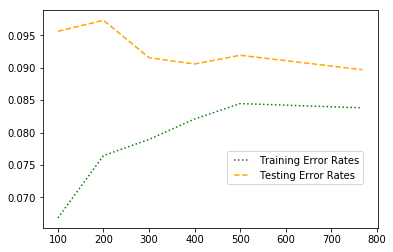

In [6]:
#training_accuracies = np.array([training_accuracy_100, training_accuracy_200,training_accuracy_300,\
#                              training_accuracy_400, training_accuracy_500, training_accuracy_all])
#training_error_rates = 1 - training_accuracies

#testing_accuracies = np.array([testing_accuracy_100, testing_accuracy_200,testing_accuracy_300,\
 #                              testing_accuracy_400, testing_accuracy_500, testing_accuracy_all])
#testing_error_rates = 1 - testing_accuracies

fig, ax = plt.subplots()

l1, = ax.plot(training_size, training_errors, color='green', linestyle=':')
l2, = ax.plot(training_size, testing_errors, color='orange', linestyle='--')
ax.legend(handles=[l1, l2], labels=['Training Error Rates', 'Testing Error Rates'],
              loc=[0.55, 0.2],frameon = True,numpoints = 3);

**Ans:**

**Q1.4 :**
I got the definition of the "error rate" as "1- accuracy" from 4c sklearn-classification-regression-bkhw-Spring 2019-.pdf on Data X Github. It is worth noting that the error rate may also refer to RMSE. 

To interpret the graph: As we increase the number of training data, we observe a decreasing error rate for test data. This indicates that the linear model is learning the data better with increased amount of training data and no overfitting has occurred. 

However, the error rate for training data is not monotonic. When the training size is small, there is less data to fit which could result in lower error rate. As the training size gets somewhat large, there is more data to fit and the training error rate could increase. 

A desired model should have the same error rate for training samples and testing samples, and the smaller the error rate the better. 

## Part 2 - Classification


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.

Here the model is trained to classify each instance into a set of predefined discrete classes. On inputting a feature vector into the model, the trained model is able to predict a class of that instance.


#### Q2.1
Bucket the values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)

**HINT:** Use pandas.cut

This converts the given dataset  into a classification problem. Use this dataset with transformed 'heating load' to create a **logistic regression** classifiction model that predicts heating load type of a building. Split the data randomly into training and test set. Train the model on 80% of the data (80-20 split).


In [7]:
# your code
df2 = df.copy()
df2['Y1'] = pd.cut(df2['Y1'], [-np.inf,14,28,np.inf], labels = ['Low', 'Medium', 'High'])
print(df2.head())

# For the purpose of generating the confusion matrix later, I define label 'Low' with 0, 'Medium' with 1, 'High' with 2
X2 = df2.loc[:, 'X1':'X8']
Y2 = df2["Y1"]
Y2 = Y2.map({'Low': 0, 'Medium': 1,'High' :2})
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 100)
print('\nNumber of training samples: ', len(x_train))
print('Number of test samples: ', len(x_test))

     X1     X2     X3      X4   X5  X6   X7  X8      Y1
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  Medium
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  Medium
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  Medium
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  Medium
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  Medium

Number of training samples:  614
Number of test samples:  154


#### Q2.2 
- Print the training and test accuracies
- Print the confusion matrix
- Print the precision and recall numbers for all the classes


In [8]:
from sklearn.linear_model import LogisticRegression
Logistic_Model = LogisticRegression()

#Training the model and calculating accuracies
Logistic_Model.fit(x_train, y_train);

training_accuracy = Logistic_Model.score(x_train, y_train)
print ('Training Accuracy:', training_accuracy)

test_accuracy = Logistic_Model.score(x_test, y_test)
print('Testing Accuracy: ', test_accuracy)

Training Accuracy: 0.8078175895765473
Testing Accuracy:  0.7727272727272727


In [9]:
#Generating the confusion Matrix
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = Logistic_Model.predict(x_test)
CM = pd.DataFrame(confusion_matrix(y_true, y_pred),columns = ['Predicted Low','Predicted Medium','Predicted High'],\
                  index = ['Actual Low','Actual Medium','Actual High']
                 )
print ('Confusion matrix of test data is: \n', CM)

Confusion matrix of test data is: 
                Predicted Low  Predicted Medium  Predicted High
Actual Low                42                 1               0
Actual Medium              9                22              25
Actual High                0                 0              55


In [10]:
from sklearn.metrics import precision_score
print("Average precision for the 3 classes is: ", precision_score(y_true, y_pred, average = None) )

from sklearn.metrics import recall_score
print("Average recall for the 3 classes is: ", recall_score(y_true, y_pred, average = None) )

Average precision for the 3 classes is:  [0.82352941 0.95652174 0.6875    ]
Average recall for the 3 classes is:  [0.97674419 0.39285714 1.        ]


#### Q2.3
##### K Fold Cross Validation

 In k-fold cross-validation, the shuffled training data is partitioned into k disjoint sets and the model is trained on k −1 sets and validated on the kth set. This process is repeated k times with each set chosen as the validation set once. The cross-validation accuracy is reported as the average accuracy of the k iterations
 
__Use 7-fold cross validation on the training data. Print the average accuracy__

In [11]:
# your code
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 7)
print(kf)

acc = cross_val_score(Logistic_Model, x_train, y_train, cv = kf)

avg_acc = np.mean(acc)
print("\nAveraged cross validation accuracy: ", avg_acc)

KFold(n_splits=7, random_state=None, shuffle=False)

Averaged cross validation accuracy:  0.780116435288849


__Q2.4__

One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance functions as a part of classification. If we Scale features in the range [0,1] it is called unity based normalization.

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [12]:
X_Norm = (X2-X2.min())/(X2.max()-X2.min())
x_train_norm, x_test_norm, y_train, y_test = train_test_split(X_Norm, Y2, test_size = 0.2, random_state = 100)


#Training the model and calculating accuracies
logistic_model_norm = LogisticRegression()
logistic_model_norm.fit(x_train_norm, y_train);

training_accuracy_norm = logistic_model_norm.score(x_train_norm, y_train)
print ('Training Accuracy before normalization: ', training_accuracy)
print ('Training Accuracy after normalization: ', training_accuracy_norm)


test_accuracy_norm = logistic_model_norm.score(x_test_norm, y_test)
print('\nTesting Accuracy before normalization : ', test_accuracy)
print('Testing Accuracy after normalization : ', test_accuracy_norm)

Training Accuracy before normalization:  0.8078175895765473
Training Accuracy after normalization:  0.8224755700325733

Testing Accuracy before normalization :  0.7727272727272727
Testing Accuracy after normalization :  0.8116883116883117


**Ans:**
**Q2.4 :**
By utilizing unity based normalization, both the training accuracy (0.822 > 0.808) and testing accuracy (0.812 > 0.773) have improved compared to using the original dataset. This indicates that the training has become less sensitivity to the scale of features.